<a href="https://colab.research.google.com/github/Smartpero/Web_Scraper/blob/main/Dive_into__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# A. Regression Model Implementation

## Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forest+fires.zip to forest+fires.zip


In [38]:
# Load dataset
import zipfile
zip_path = "forest+fires.zip"

with zipfile.ZipFile(zip_path) as z:
    # get first file name inside zip
    filename = z.namelist()[0]
    with z.open(filename) as f:
        df = pd.read_csv(f)

print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [39]:
# display first few rows
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


The aim of the regression problem is to predict the burned area of forest fires in the northern region of Portugal by using meteorological and other data

## Exploratory Data Analysis

In [40]:
# Summary statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [41]:
# drop non-numeric varaible columns
data = df.drop(columns=["month", 'day'], axis=1)

In [42]:
# Show correlation matrix
data.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


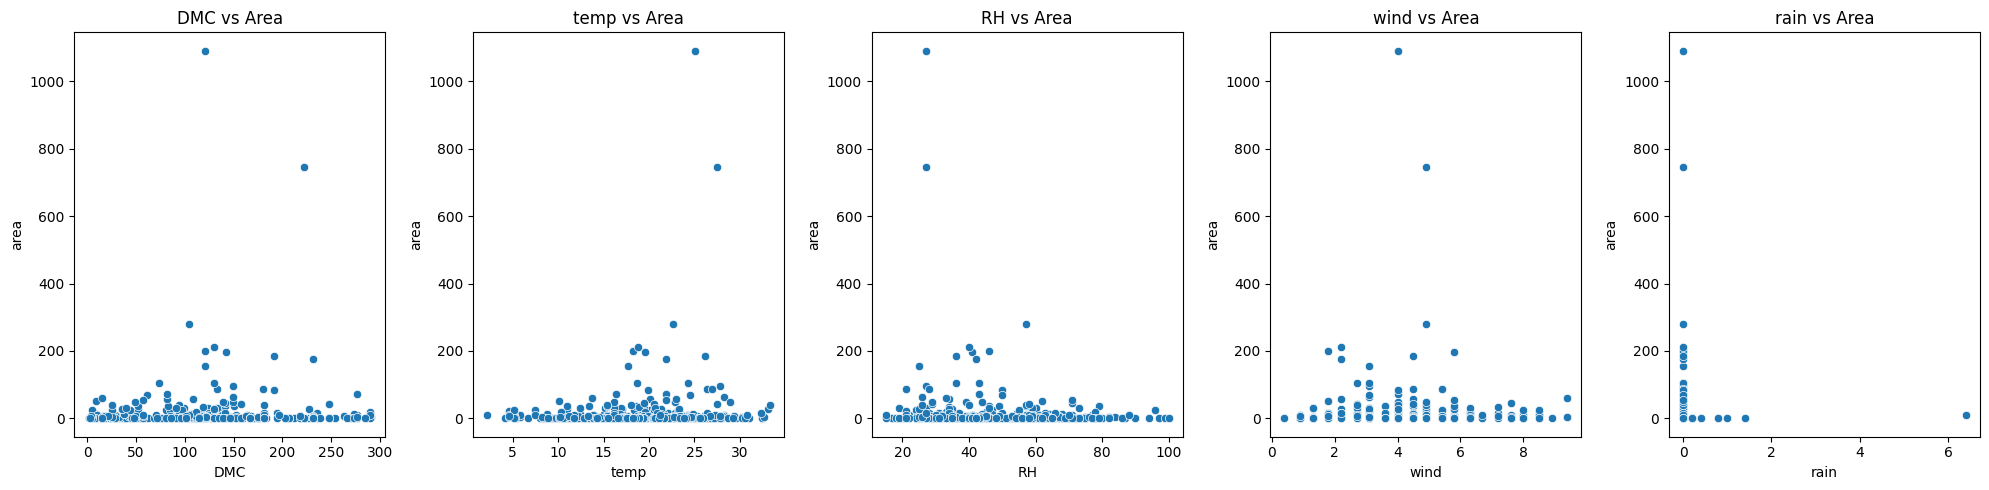

In [43]:
# Visualise features vs target variable plot
features = ['DMC', 'temp', 'RH', 'wind', 'rain']
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data['area'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Area')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [44]:
X_data = data[["DMC", "temp", "RH", "wind", "rain"]]
Y_data = data["area"]

In [45]:
#check for nulls
X_data.isnull().sum()

,0
DMC,0
temp,0
RH,0
wind,0
rain,0


In [46]:
# Scale the target variable
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y_data.values.reshape(-1, 1))

In [47]:
Y_data_scaled = Y_scaled

## Train-Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data_scaled, test_size=0.2, random_state=42)

## Model Training : Linear Regression vs Other Regression Models

In [49]:
# Evaluate Model Performance
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"Model": name, "MSE": mse, "R2": r2}

model_results = []

In [50]:
#Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_results.append(evaluate_model(model_linear, X_test, y_test, "Linear Regression"))

# Random Forest Regression
model_random_forest = RandomForestRegressor()
model_random_forest.fit(X_train, y_train)
model_results.append(evaluate_model(model_random_forest, X_test, y_test, "Random Forest"))

# Xgboost
model_xgboost = xgb.XGBRegressor()
model_xgboost.fit(X_train, y_train)
model_results.append(evaluate_model(model_xgboost, X_test, y_test, "XGBoost"))

model_results_df = pd.DataFrame(model_results)
print(model_results_df)

               Model       MSE        R2
0  Linear Regression  2.911368  0.001148
1      Random Forest  2.975950 -0.021009
2            XGBoost  2.949575 -0.011960


## Summary:

### Data Analysis Key Findings

*   Target variables was scaled transformed during data data preprocessing
*   The dataset was split into training and testing sets with an 80/20 ratio.
*   A Linear Regression model was successfully trained on the training data.
*   The trained model was evaluated on the testing data, resulting in a Mean Squared Error (MSE) of approximately 2.91136 and an R-squared (R2) score of approximately 0.00148.
*   Performance of linear model was compared with other regression models such as RandomForest and  Xgboost. Logistic Regression was not properly suited for the target variable


### Insights:

*   The low positive R-squared score suggests that the Linear model explains very little of the variance in the target variable. Further investigation into feature engineering, model selection, or hyperparameter tuning can be used to improve performance.

*  Linear Regression Model performs better than other regression models


*   Negative R2 score signifiees poor model performance


## Reference:

* Cortez, Paulo and Anbal Morais. "Forest Fires." UCI Machine Learning Repository, 2007, https://doi.org/10.24432/C5D88D.

# B. Classification Model Implementation

## Load Dataset

In [16]:
from google.colab import files
uploaded = files.upload()

Saving pirvision_fog_presence_detection.zip to pirvision_fog_presence_detection.zip


The PIRvision dataset contains occupancy detection data collected from a Synchronized Low-Energy Electronically-chopped Passive Infra-Red sensing node in residential and office environments. Each observation represents 4 seconds of recorded human activity within the sensor Field-of-View (FoV).

In [17]:
# Load dataset
import zipfile
zip_path = "pirvision_fog_presence_detection.zip"

with zipfile.ZipFile(zip_path) as z:
    # get first file name inside zip
    filename = z.namelist()[0]
    with z.open(filename) as f:
        df = pd.read_csv(f)

df.head()

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


Interestingly Target Variable "Label" is already one-hot encoded to indicate presence or absence of occupancy

## Exploratory Data Analysis

In [18]:
# shape
df.shape

(7651, 59)

In [19]:
# Summary statistics
df.describe()

,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
count,7651.000000,7651.000000,7.651000e+03,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,...,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000
mean,0.332767,80.383871,2.501256e+05,11013.891648,11517.838452,11578.490786,11269.104169,10795.036989,10312.208600,9907.840413,...,11460.947458,11559.512874,11541.448438,11439.599529,11283.987061,11103.084564,10919.279441,10743.028624,10585.803294,10449.395373
std,0.818477,22.861417,4.292998e+06,591.799276,656.683841,663.111916,605.936126,537.247861,501.407122,499.632397,...,599.157249,627.996166,619.196749,598.563183,571.520024,546.310552,518.341483,487.208570,464.748286,450.231316
min,0.000000,0.000000,2.613000e+03,2615.000000,2614.000000,2611.000000,2612.000000,2613.000000,2616.000000,2614.000000,...,2606.000000,2606.000000,2606.000000,2605.000000,2605.000000,2609.000000,2605.000000,2604.000000,2603.000000,2602.000000
25%,0.000000,86.000000,1.033300e+04,10787.500000,11272.500000,11338.000000,11051.000000,10629.000000,10182.000000,9764.000000,...,11222.000000,11313.000000,11301.000000,11211.000000,11083.000000,10935.500000,10794.000000,10650.000000,10513.000000,10388.000000
50%,0.000000,86.000000,1.043100e+04,11002.000000,11557.000000,11629.000000,11301.000000,10790.000000,10311.000000,9910.000000,...,11488.000000,11583.000000,11566.000000,11471.000000,11319.000000,11137.000000,10948.000000,10760.000000,10597.000000,10454.000000
75%,0.000000,88.000000,1.056050e+04,11267.000000,11885.000000,11957.000000,11550.000000,10982.000000,10443.000000,10035.000000,...,11837.000000,11961.000000,11928.000000,11781.000000,11571.000000,11334.000000,11097.000000,10876.000000,10683.000000,10524.000000
max,3.000000,89.000000,1.116026e+08,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000


In [20]:
data = df.drop(columns=["Date", "Time"], axis=1)

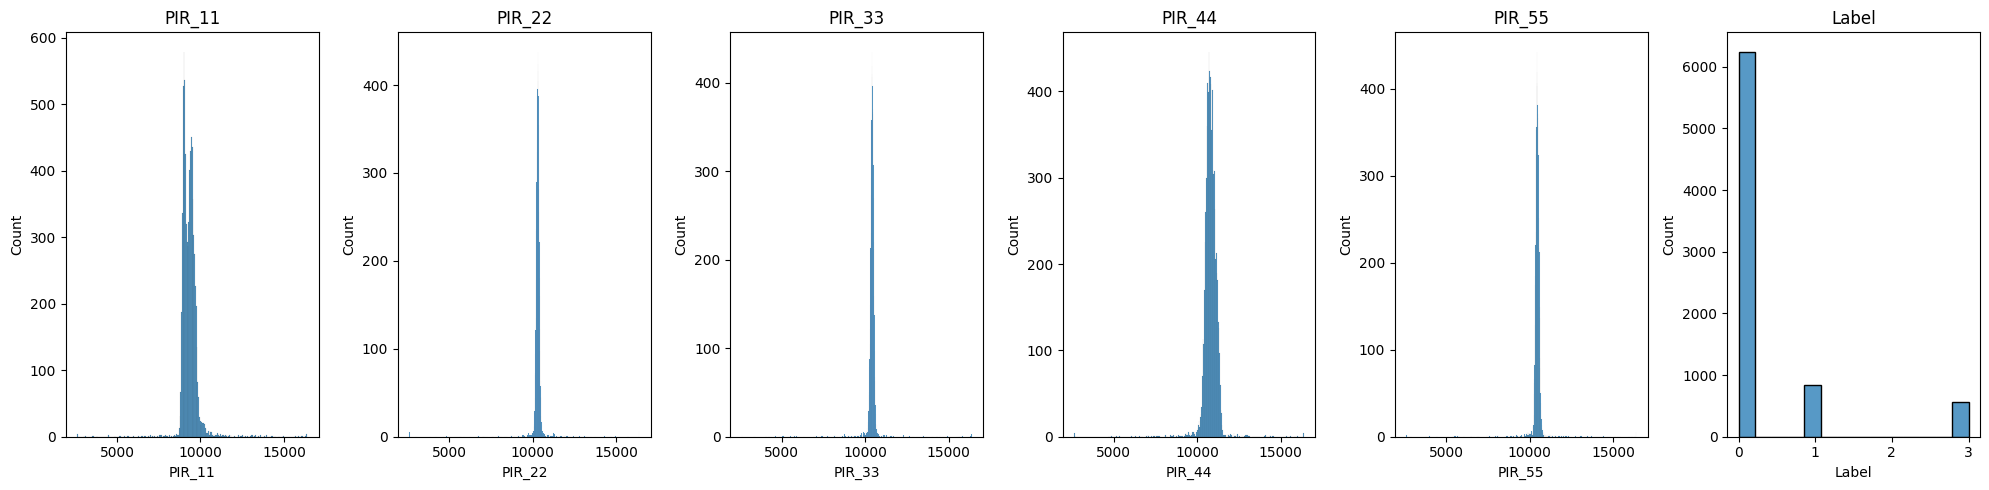

In [21]:
# Visualise features
features = ['PIR_11', 'PIR_22', 'PIR_33', 'PIR_44', 'PIR_55', "Label" ]#pick random relevant features alongside target "Label"
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
for i, feature in enumerate(features):
    sns.histplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'{feature}')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [22]:
X_data = data[['PIR_11', 'PIR_22', 'PIR_33', 'PIR_44', 'PIR_55']]
Y_data = data["Label"]

## Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42, stratify=Y_data)


## Feature Engineering

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training & Performance Evaluation

In [31]:
def eval_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return {"Model": name, "Accuracy": accuracy, "Classification Report": classification_rep, "Confusion Matrix" : conf_matrix}

model_results = []

In [32]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
model_results.append(eval_model(log_reg, X_test, y_test, "Logistic Regression"))

# Support Vector Machine (SVM)
svm_clf = SVC(kernel="linear")  # for linear classifier
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
model_results.append(eval_model(svm_clf, X_test, y_test, "SVM"))

# Support Vector Machine (SVM)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
model_results.append(eval_model(lda, X_test, y_test, "LDA"))


model_results_df = pd.DataFrame(model_results)
print(model_results_df)

                 Model  Accuracy  \
0  Logistic Regression  0.856303   
1                  SVM  0.905944   
2                  LDA  0.834749   

                               Classification Report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   

                              Confusion Matrix  
0   [[1244, 6, 0], [123, 43, 1], [46, 44, 24]]  
1  [[1233, 17, 0], [30, 137, 0], [34, 63, 17]]  
2     [[1247, 3, 0], [164, 1, 2], [76, 8, 30]]  


### Visualise Model Confusion Matrices

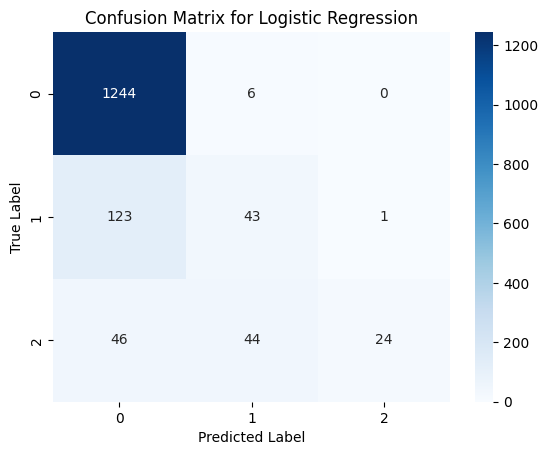

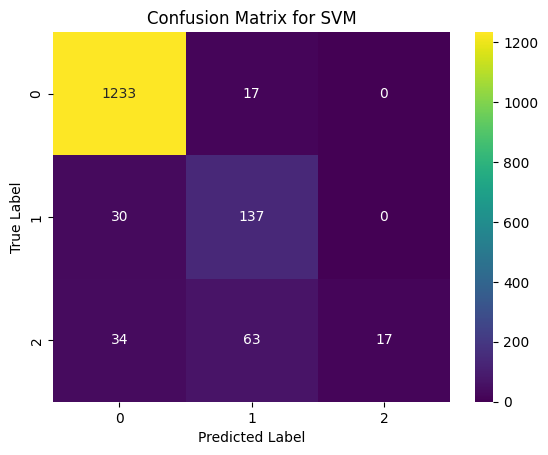

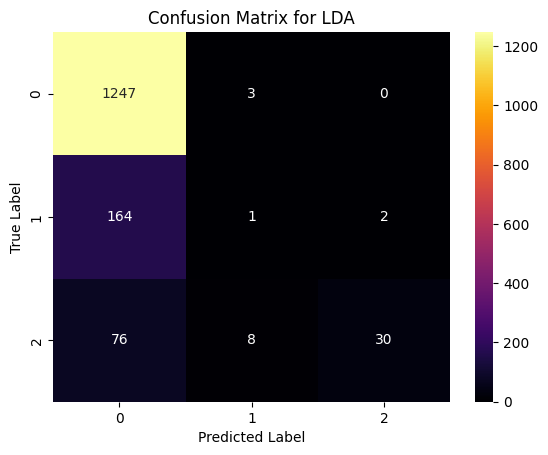

In [36]:
# Confusion matrix from the model_results_df for the Logistic Regression
conf_matrix = model_results_df.loc[0, 'Confusion Matrix']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Confusion matrix from the model_results_df for SVM
conf_matrix = model_results_df.loc[1, 'Confusion Matrix']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

# Confusion matrix from the model_results_df for LDA
conf_matrix = model_results_df.loc[2, 'Confusion Matrix']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LDA')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Labels was used as target variable. Target variable is one-hot coded (0,1,2,3)
*   The dataset was split into training and testing sets with an 80/20 ratio.
*   3 Linear Classifiers were used to train the datasets namely: Logistic Regression, Support Vector Machines, and Linear Discriminant Analysis.
*   The trained model was evaluated on the testing data using key metrics, accuracy score, classification report and confusion matrix
*   Performance of three linear classifiers were compared


### Insights:

*   In term of model accuracy, SVM better than the Logistic Regression and Linear Disriminant Analysis; it's accuracy score was 90.59%

